Name - Y.H.A.Epa

Index Number - 190166V

Github Link - https://github.com/Yasara-Hasini/EN2550_Exercises

Question 1

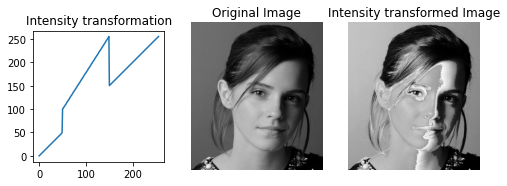

In [1]:
#Question 1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert f is not None
t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
assert len(t)==256
g = cv.LUT(f,t)

fig, ax = plt.subplots(1,3,figsize=(8,8))
ax[0].plot(t), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed Image")
plt.show()

Question 2

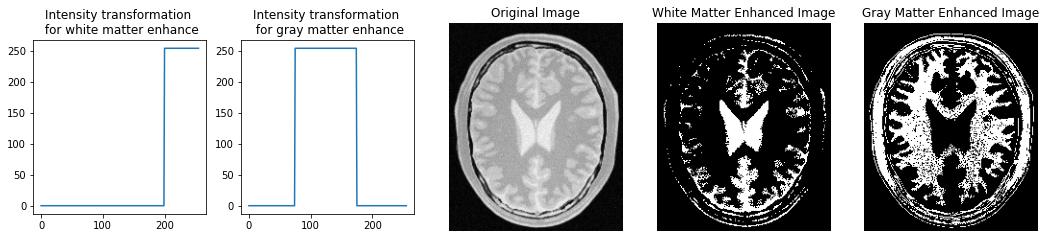

In [2]:
#Question 2 (a)(b)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert f is not None
t1 = np.zeros(200)
t2 = 255*np.ones(56)
t = np.concatenate((t1,t2),axis=0).astype(np.uint8)

t1 = np.zeros(75)
t2 = 255*np.ones(100)
t3 = np.zeros(81)
s = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv.LUT(f,t)
h = cv.LUT(f,s)

fig, ax = plt.subplots(1,5,figsize=(18,18))
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity transformation \n for white matter enhance")
ax[1].plot(s), ax[1].set_aspect('equal'), ax[1].set_title("Intensity transformation \n for gray matter enhance")
ax[2].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Original Image")
ax[3].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[3].axis('off'), ax[3].set_title("White Matter Enhanced Image")
ax[4].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB)), ax[4].axis('off'), ax[4].set_title("Gray Matter Enhanced Image")
plt.show()

* When comparing with the original image, the second image has enhansed the white parts  and the third image has enhanced the gray parts of the brain proton density image.

Question 3

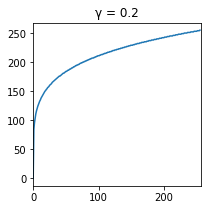

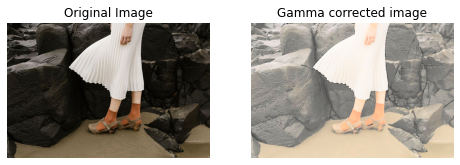

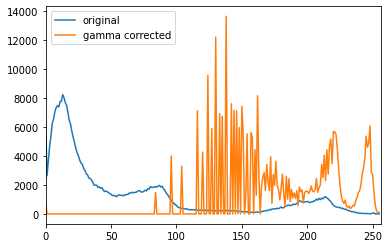

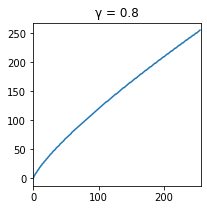

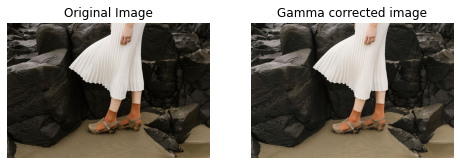

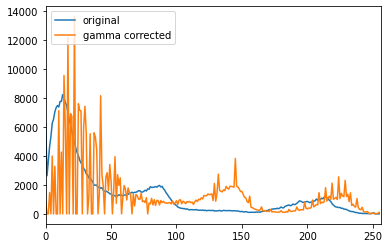

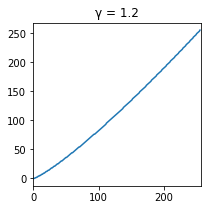

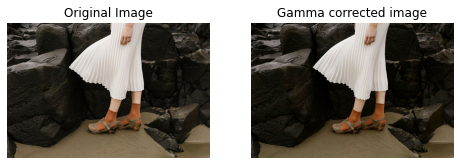

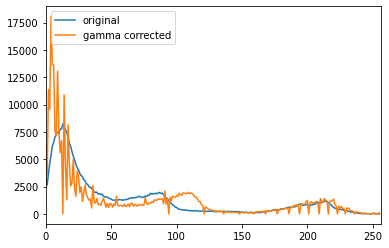

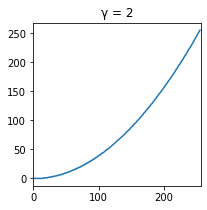

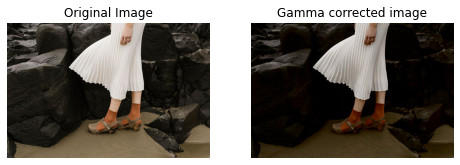

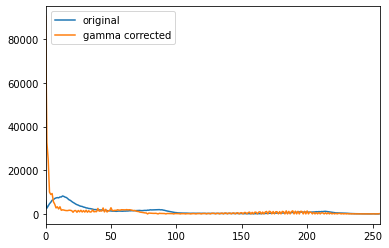

In [14]:
#Question 3 (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))
gamma = [0.2, 0.8, 1.2, 2]

for i in gamma:
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    g = cv.LUT(L,t)

    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_title("\u03B3 = "+ str(i)), plt.xlim([0,256]), ax.plot(t)
    fig, ax = plt.subplots(1,2, figsize = (8,8))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title('Original Image'), ax[0].axis('off')
    corrected_img = cv.merge([g, a, b])
    ax[1].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB)), ax[1].set_title('Gamma corrected image'), ax[1].axis('off')
    plt.show()

    #Question 3 (b)
    hist1 = cv.calcHist([img],[0],None,[256],[0,256])
    plt.plot(hist1), plt.xlim([0,256])
    hist2 = cv.calcHist([corrected_img],[0],None,[256],[0,256])
    plt.plot(hist2), plt.xlim([0,256]), plt.legend(('original','gamma corrected'),loc='upper left')
    plt.show()

* When gamma value is equal to 1, it gives the same image as the original image. But when gamma value is less than 1 and decreasing, it increases the brighness of the image. Likewise while the gamma value is greater than 1 and increasing it increases the darkness of the original image. We can see this behaviour through the plotted histograms as well. The histogram of the gamma corrected image moves to the left side of the plot due to the increase in the dark intensities of the original image with the increasing gamma value.

Question 4

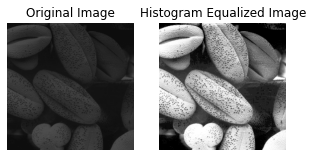

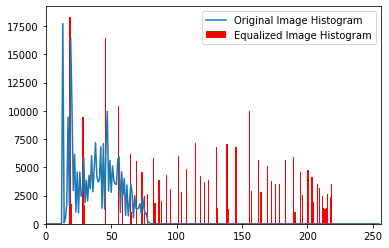

In [15]:
#Question 4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("shells.png", cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1,2,figsize=(5,5))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_RGB2BGR))
ax[0].set_title("Original Image")
ax[0].axis("off")

rows = img.shape[0]
cols = img.shape[1]
arr1 = np.zeros((256,), dtype=np.uint16)
arr2 = np.zeros((256,), dtype=np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        arr1[g] += 1

for i in range(256):
    for j in range(i+1):
        arr2[i] += arr1[j]*(255/(rows*cols))
    arr2[i] = round(arr2[i],0)
arr2 = arr2.astype(np.uint16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        img[i,j] = arr2[g]

ax[1].imshow(img, cmap="gray"), ax[1].set_title("Histogram Equalized Image"), ax[1].axis("off"), plt.show()
plt.plot(arr1), plt.hist(img.flatten(),256,[0,256],color='r'), plt.legend(('Original Image Histogram','Equalized Image Histogram'),loc='upper right'), plt.xlim([0,256])
plt.show() 

* In the original image, only the dark intensities are frequent and bright intensities are equal to zero. After histogram equalization, it gives an image which contains almost all the intensities in it. So, histogram qualization spreads the histogram which is in a shorter intensity range to a wider range of intensities.

Question 5

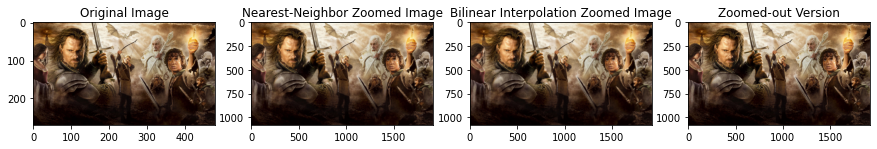

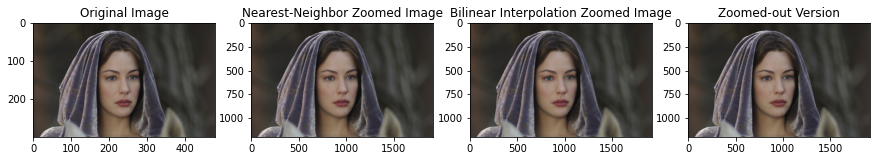

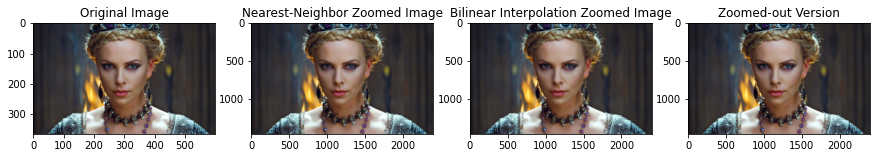

In [5]:
#Question 5 (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

originals = ["im01small.png", "im02small.png", "im03small.png"]
zoomed_outs = ["im01.png", "im02.png", "im03.png"]

for i in range(3):
    img = cv.imread(originals[i])
    img1 = cv.imread(zoomed_outs[i])
    near_img = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
    bilinear_img = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)

    fig, ax = plt.subplots(1,4, figsize=(15,15))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title("Original Image")
    ax[1].imshow(cv.cvtColor(near_img,cv.COLOR_BGR2RGB)), ax[1].set_title("Nearest-Neighbor Zoomed Image")
    ax[2].imshow(cv.cvtColor(bilinear_img,cv.COLOR_BGR2RGB)), ax[2].set_title("Bilinear Interpolation Zoomed Image")   #Question 5 (b)
    ax[3].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB)), ax[3].set_title("Zoomed-out Version")
    plt.show()

* Bilinear interpolation gives a smooth image than the nearest-neighbor method. But it cannot produce ideal sharp transitions like edges because it takes the weighted average of 2 surrounding pixels to zoom the image.

Question 6

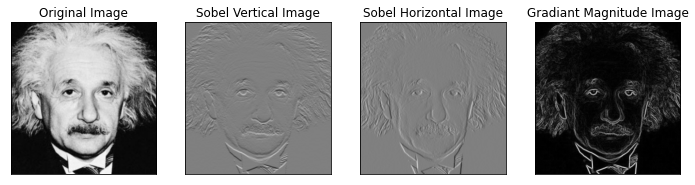

In [17]:
#Question 6 (a)
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
sobel_v = np.array([(-1,-2,-1), (0,0,0), (1,2,1)], dtype='float')
sobel_h = np.array([(-1,0,1), (-2,0,2), (-1,0,1)], dtype='float')
imv = cv.filter2D(im, -1, sobel_v)
imh = cv.filter2D(im, -1, sobel_h)
grad_mag = np.sqrt(imv**2+imh**2)

fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12,12))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255), axes[0].set_title('Original Image'), axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020), axes[1].set_title('Sobel Vertical Image'), axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020), axes[2].set_title('Sobel Horizontal Image'), axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(grad_mag, cmap='gray'), axes[3].set_title('Gradiant Magnitude Image'), axes[3].set_xticks([]),axes[3].set_yticks([])
plt.show()

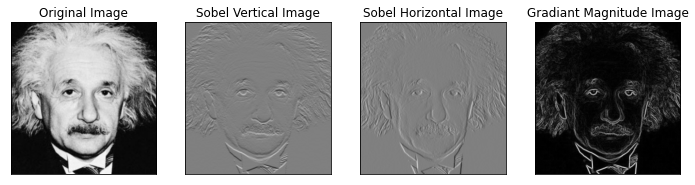

In [18]:
#Question 6 (b)
import cv2 as cv
import numpy as np

img = cv.imread("einstein.png")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(float)
x_edge = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
y_edge = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
edge = np.sqrt(x_edge**2+y_edge**2)

fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12,12))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255), axes[0].set_title('Original Image'), axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(y_edge, cmap='gray', vmin=-1020, vmax=1020), axes[1].set_title('Sobel Vertical Image'), axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(x_edge, cmap='gray', vmin=-1020, vmax=1020), axes[2].set_title('Sobel Horizontal Image'), axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(edge, cmap='gray'), axes[3].set_title('Gradiant Magnitude Image'), axes[3].set_xticks([]),axes[3].set_yticks([])
plt.show()

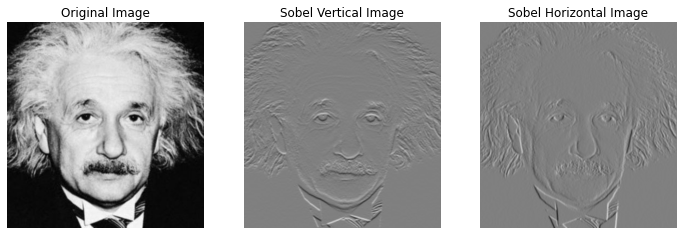

In [19]:
#Question 6 (c)
import cv2 as cv
import numpy as np

im = cv.imread("einstein.png")
im = cv.cvtColor(im,cv.COLOR_BGR2GRAY).astype(float)
sobel_h_kernel = np.array([1,2,1], dtype=np.float32)
sobel_v_kernel = np.array([1,0,-1], dtype=np.float32)
im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel)
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel)

fig, ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255), ax[0].set_title("Original Image"), ax[0].axis("off")
ax[1].imshow(im1, cmap='gray', vmin=-1020, vmax=1020), ax[1].set_title("Sobel Vertical Image"), ax[1].axis("off")
ax[2].imshow(im2, cmap='gray', vmin=-1020, vmax=1020), ax[2].set_title("Sobel Horizontal Image"), ax[2].axis("off")
plt.show()

* Although we used 3 methods for sobel filtering the image, there is no much difference in the results. All three methods give almost the same sobel vertical and sobel horizontal images

Question 7

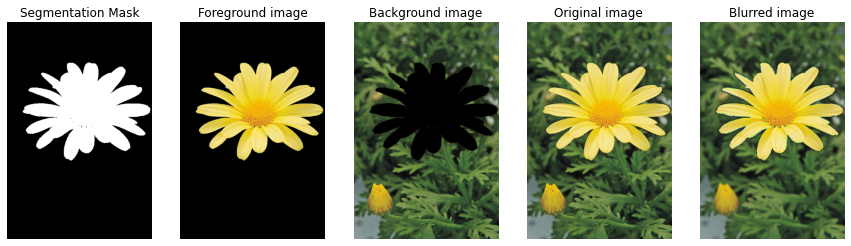

In [9]:
#Question 7 (a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("daisy.jpg")
mask = np.zeros(img.shape[:2], np.uint8)

background_model = np.zeros((1,65), np.float64)
foreground_model = np.zeros((1,65), np.float64)
rectangle = (50,50,505,505)
cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask1 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask1[:,:,np.newaxis]

fig, ax = plt.subplots(1,5, figsize = (15,15))
ax[0].imshow(mask1, cmap='gray'), ax[0].set_title("Segmentation Mask"), ax[0].axis("off")
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), ax[1].set_title("Foreground image"), ax[1].axis("off")

cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==3)|(mask==1),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)), ax[2].set_title("Background image"), ax[2].axis("off")
ax[3].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), ax[3].set_title("Original image"), ax[3].axis("off")

#Question 7 (b)
blurred_img = img1 + cv.GaussianBlur(img2,(15,15),0)
ax[4].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB)), ax[4].set_title("Blurred image"), ax[4].axis("off")
plt.show()

Question 7 (c)
* When the foreground image and the blurred background image is added on top of each other the dark (black) pixels get added up to the blurred image. Therefore the edge of the flower is somewhat dark.